# Abdullah Al-Kaf

## Milestone 2


## Research question/interests

I want to work on this dataset to understand how credit scores are calculated, how they are used, and especially how they predict the probability of future occurrences like defaults. I have always been interested in how machine learning is used to try to predict the future!

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/application_record.csv')

df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


## Milestone 3

### Task 1


In [8]:
%matplotlib inline
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
print("Number of rows and number of columns of the whole dataset", df.shape)

Number of rows and number of columns of the whole dataset (438557, 18)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [11]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [12]:
df.nunique(axis='rows')


ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [13]:
df.FLAG_MOBIL.unique()

#We can see that the column of FLAG_MOBIL has only one possible value (the number 1). So we might want to drop this column

array([1])

In [14]:
df.DAYS_BIRTH.describe()
df.DAYS_EMPLOYED.describe()

count    438557.000000
mean      60563.675328
std      138767.799647
min      -17531.000000
25%       -3103.000000
50%       -1467.000000
75%        -371.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [15]:
#We can see that the value of days_birth and days_employed are calculated by the number of days, we might want
#switch that to years_employed and years_birth. They are also negative numbers for some reason so it would probably be better to change that



In [16]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
# As we can see, the only column that has Null values is the occupation_type column and it has a considerable amount of null
# values



In [18]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6022176.269842,0.427390,187524.286010,-15997.904649,60563.675328,1.000000,0.206133,0.287771,0.108207,2.194465
std,571637.023257,0.724882,110086.853066,4185.030007,138767.799647,0.000000,0.404527,0.452724,0.310642,0.897207
min,5008804.000000,0.000000,26100.000000,-25201.000000,-17531.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,5609375.000000,0.000000,121500.000000,-19483.000000,-3103.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6047745.000000,0.000000,160780.500000,-15630.000000,-1467.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,6456971.000000,1.000000,225000.000000,-12514.000000,-371.000000,1.000000,0.000000,1.000000,0.000000,3.000000
max,7999952.000000,19.000000,6750000.000000,-7489.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,20.000000


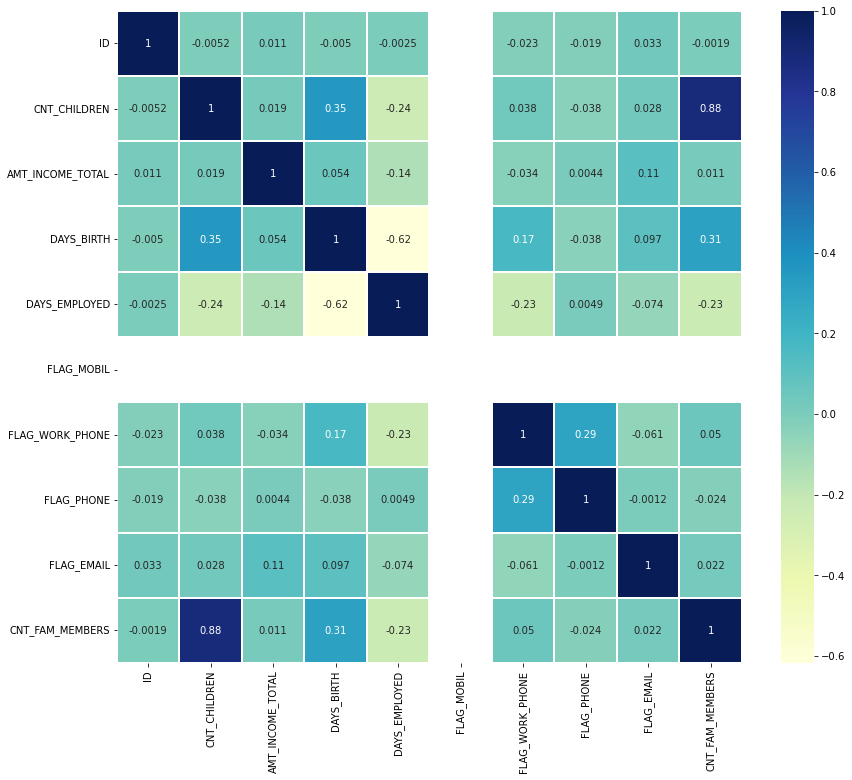

In [32]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#I used this corellation heatmap to try to find a correlation between Income and Days_Employed or Days_Birth but
#could not find anything significant

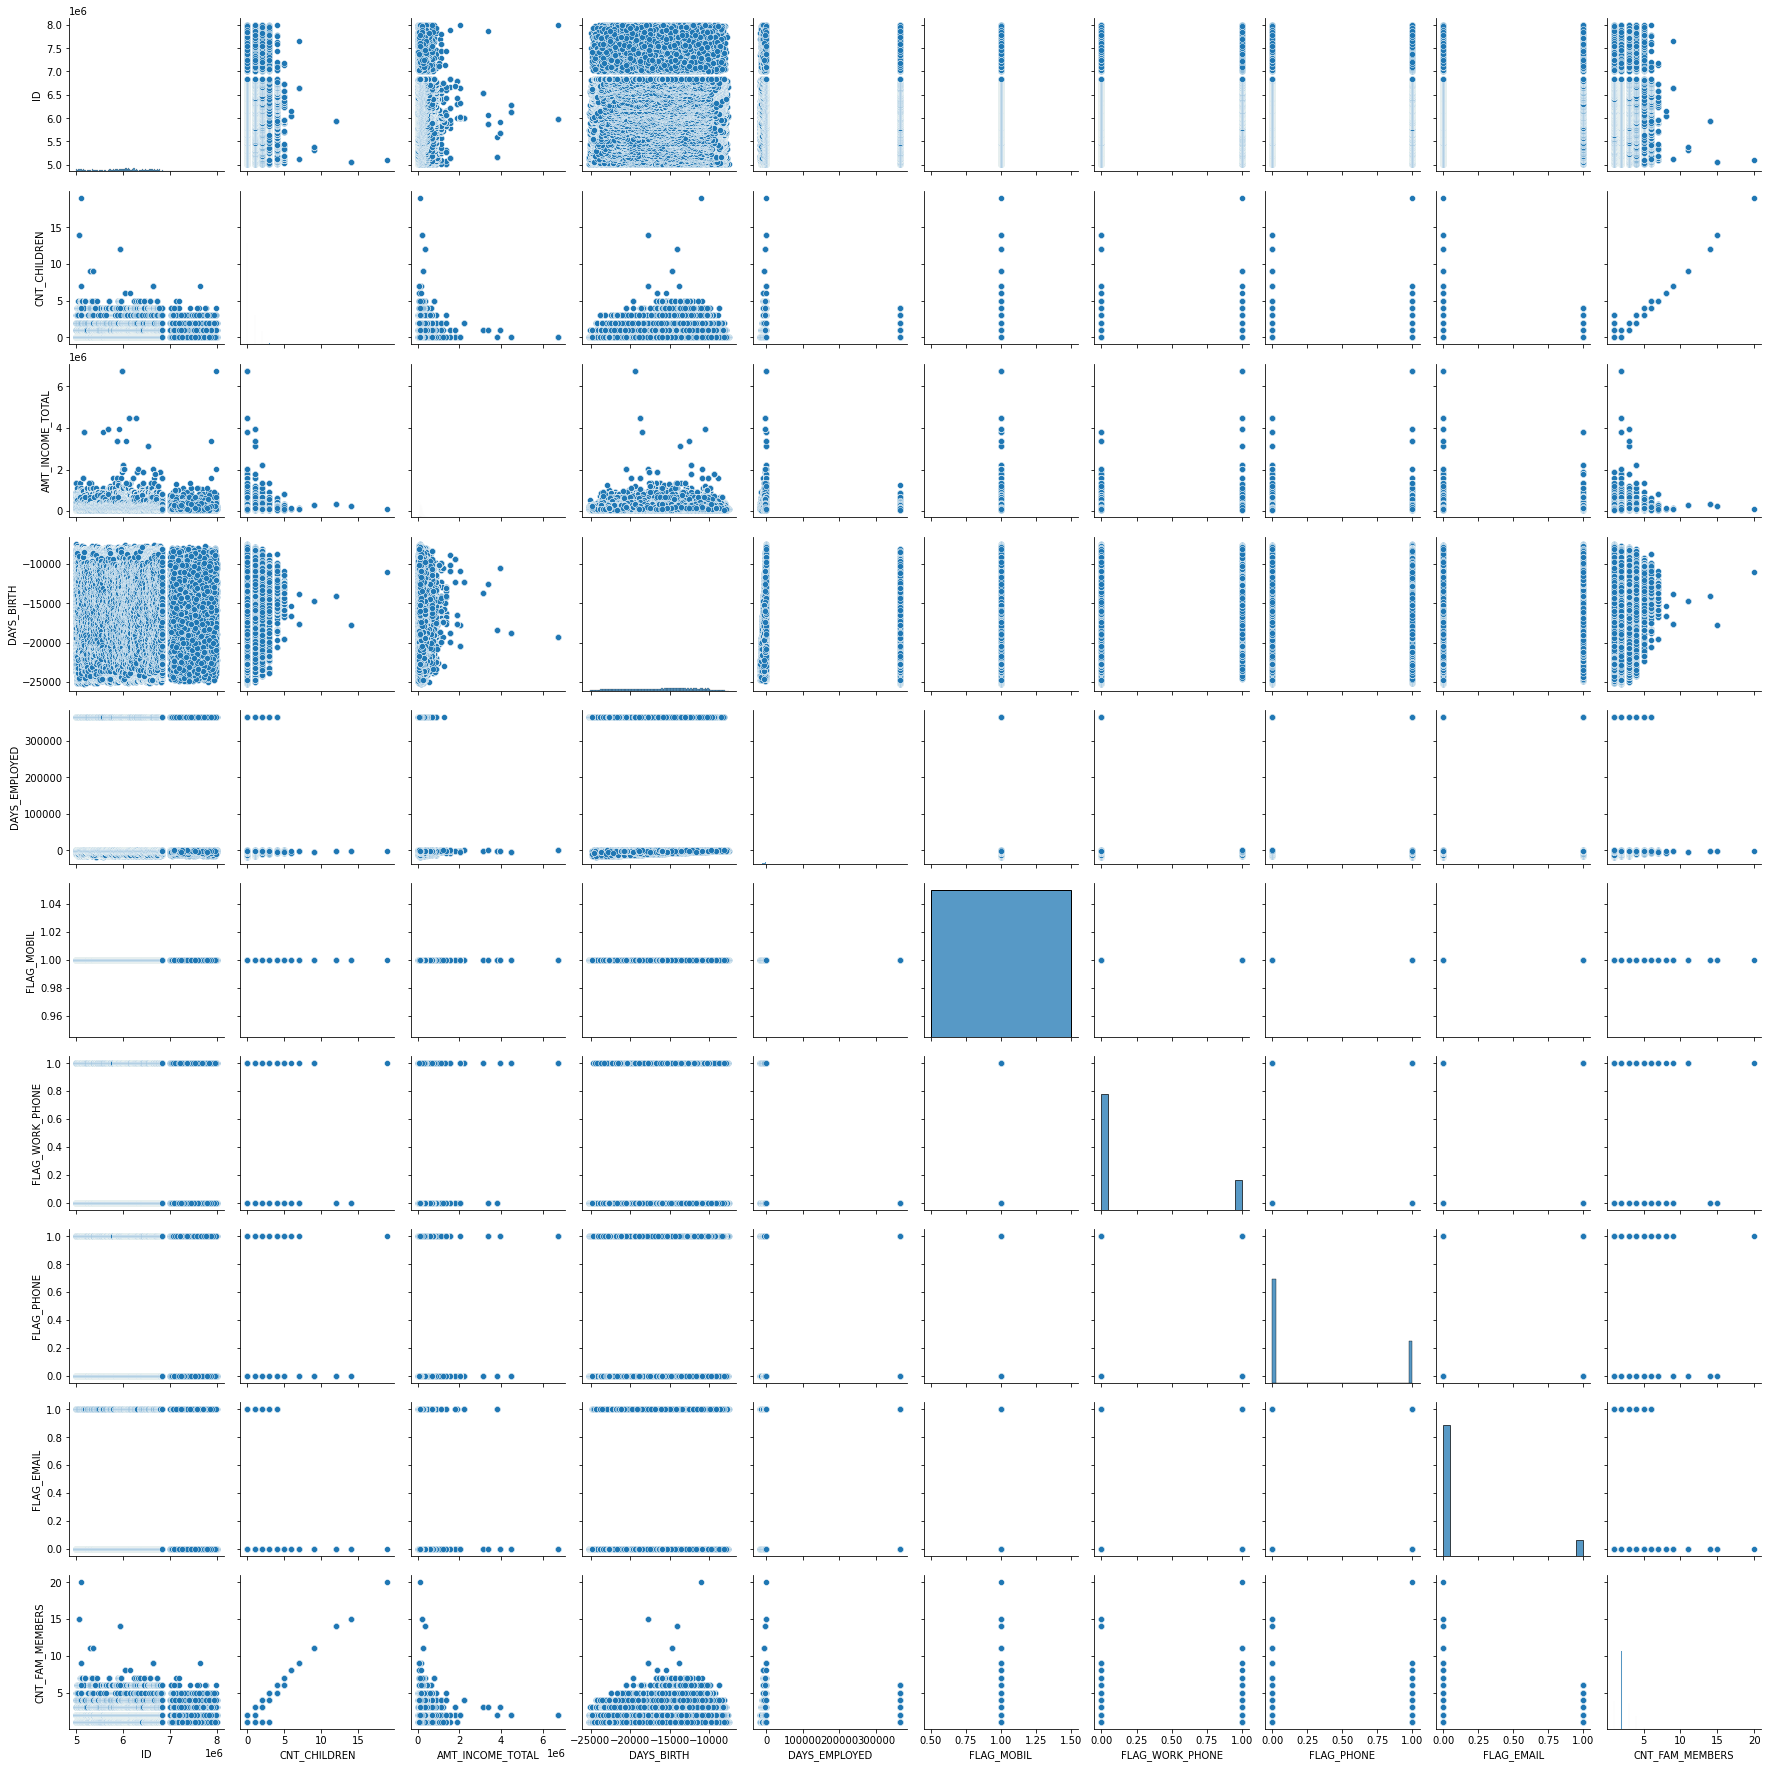

In [21]:
g = sns.pairplot(df)
g

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile


##As we can see, the pandas profile gives us almost everything we need for an EDA. We have multiple very useful visualizations
##corelation graphs and matrices. And a simple overview and summary.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

### Task 2 - Cleaning and Wrangling


In [33]:
#Dropping the column FLAG_MOBIL since it is a constant

df_clean = df.drop('FLAG_MOBIL', axis='columns')
df_clean = df_clean.drop('FLAG_OWN_REALTY', axis='columns')
df_clean = df_clean.drop('FLAG_WORK_PHONE', axis='columns')
df_clean = df_clean.drop('FLAG_PHONE', axis='columns')
df_clean = df_clean.drop('FLAG_EMAIL', axis='columns')

##Dropping other columns because they are seemingly irrelevant


##Cleaning and renaming the columns
df_clean = df_clean.rename(columns={"CODE_GENDER": "Gender", "FLAG_OWN_CAR": "Car Owner?", "CNT_CHILDREN": "Number of Children", "AMT_INCOME_TOTAL": "Total Income", "NAME_INCOME_TYPE": "Income Type", "NAME_EDUCATION_TYPE": "Education", "NAME_FAMILY_STATUS": "Family Status", "NAME_HOUSING_TYPE": "Housing", "DAYS_BIRTH": "Age", "DAYS_EMPLOYED": "Years Employed", "OCCUPATION_TYPE": "Occupation", "CNT_FAM_MEMBERS":"Num of Family Members"})



In [35]:
df_clean['Age'] = df_clean['Age'].div(-365).round(1)

#Formatted age

In [36]:
df_clean['Years Employed'] = df_clean['Years Employed'].div(-365).round(1)

#Formatted Number of years working

In [37]:
df_clean

,ID,Gender,Car Owner?,Number of Children,Total Income,Income Type,Education,Family Status,Housing,Age,Years Employed,Occupation,Num of Family Members
0,5008804,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.9,12.4,NaN,2
1,5008805,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.9,12.4,NaN,2
2,5008806,M,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.8,3.1,Security staff,2
3,5008808,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.4,8.4,Sales staff,1
4,5008809,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.4,8.4,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,62.2,-1000.7,NaN,1
438553,6840222,F,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,43.7,8.2,Laborers,1
438554,6841878,F,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,22.4,1.0,Sales staff,1
438555,6842765,F,N,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,59.4,-1000.7,NaN,2


In [27]:
df_clean.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))



,ID,Number of Children,Total Income,Age,Years Employed,Num of Family Members
count,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6022176.269842,0.427390,187524.286010,43.830089,-165.933682,2.194465
std,571637.023257,0.724882,110086.853066,11.465683,380.198708,0.897207
min,5008804.000000,0.000000,26100.000000,20.500000,-1000.700000,1.000000
25%,5609375.000000,0.000000,121500.000000,34.300000,1.000000,2.000000
50%,6047745.000000,0.000000,160780.500000,42.800000,4.000000,2.000000
75%,6456971.000000,1.000000,225000.000000,53.400000,8.500000,3.000000
max,7999952.000000,19.000000,6750000.000000,69.000000,48.000000,20.000000


### Task 3 - Method Chaining

In [40]:
def load_and_process(url_or_path_to_csv_file):


    data1 = (
          pd.read_csv('../data/raw/application_record.csv')
          .rename(columns={"CODE_GENDER": "Gender", "FLAG_OWN_CAR": "Car Owner?", "CNT_CHILDREN": "Number of Children", "AMT_INCOME_TOTAL": "Total Income", "NAME_INCOME_TYPE": "Income Type", "NAME_EDUCATION_TYPE": "Education", "NAME_FAMILY_STATUS": "Family Status", "NAME_HOUSING_TYPE": "Housing", "DAYS_BIRTH": "Age", "DAYS_EMPLOYED": "Years Employed", "OCCUPATION_TYPE": "Occupation", "CNT_FAM_MEMBERS":"Num of Family Members"})
          .drop('FLAG_MOBIL', axis='columns')
          .drop('FLAG_OWN_REALTY', axis='columns')
          .drop('FLAG_WORK_PHONE', axis='columns')
          .drop('FLAG_PHONE', axis='columns')
          .drop('FLAG_EMAIL', axis='columns')
    )

    
    data2 = (
        data1.fillna("Unknown")
          .replace("F", "Female")
          .replace("M", "Male")
          .replace("Y", "Yes")
          .replace("N", "No")
          .reset_index()




    )

    return data2


In [84]:
df_clean2 = load_and_process('../data/raw/application_record.csv')

df_clean2['Years Employed'] = df_clean2['Years Employed'].div(-365).round(1)

#Formatted Number of years working

df_clean2['Age'] = df_clean2['Age'].div(-365).round(1)

#Formatted age




indexNames = df_clean2[ df_clean2['Years Employed'] < 0 ].index
df_clean2.drop(indexNames , inplace=True)

#Removed negative values from 'Years Employed'

### Task 4 - Visualisations and Conclusions

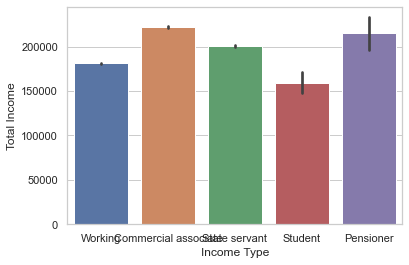

In [85]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Income Type", y="Total Income", data=df_clean2)


* It is no surprise that the bar plot shows students having the least income when compared to Workers, Gov workers, etc. But I also found it surprising that pensioners are near the top of the heirarchy, coming right after commerical associates

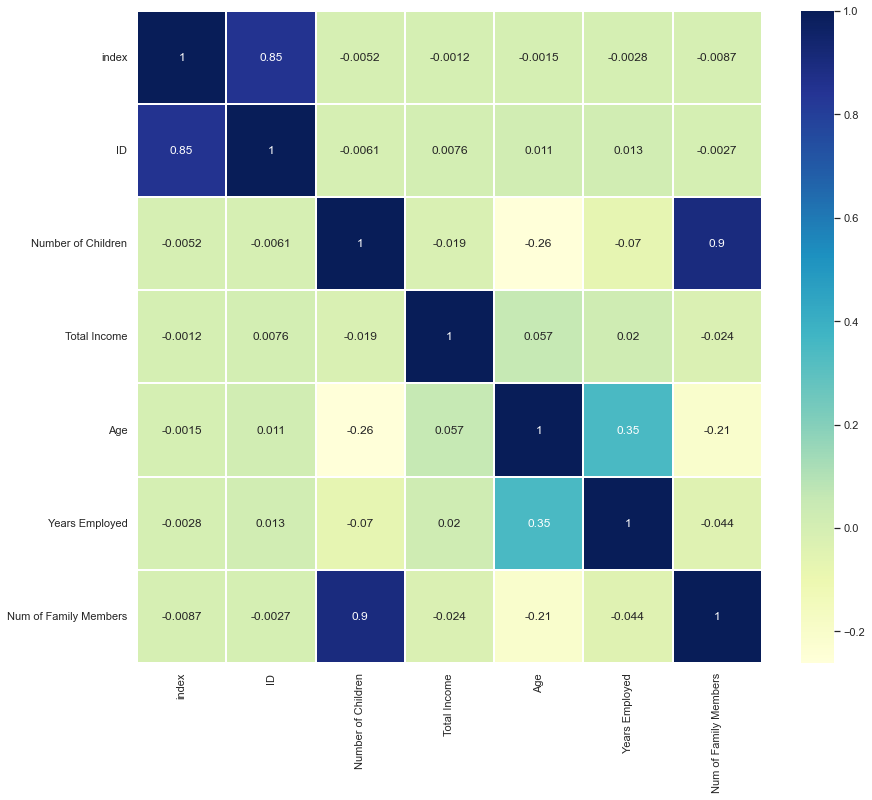

In [86]:
plt.figure(figsize=(14,12))
sns.heatmap(df_clean2.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

* We can see from this correlation heatmap that there is a positive corelation between income, family status, and number of children/members. With customers who are married and those that have a larger family having an increased income (probably because there are multiple sources of income in the household) 

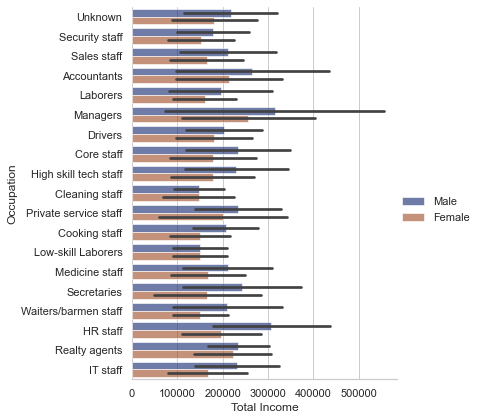

In [87]:
g = sns.catplot(
    data=df_clean2, kind="bar",
    x="Total Income", y="Occupation", hue="Gender",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("")

g

* We can see from this grouped bar plot that in practically every occupation listed in the dataset, males do in fact gain more than females. Even in occupations where females are portrayed to hold the most jobs, like Secretary and Waitering work, Males still get paid more. Another observation is that HR Staff and Managers have the most pay overall, while Cleaning and Low-skill labor jobs pay the least.

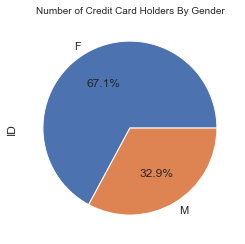

In [88]:
colors = sns.color_palette('pastel')[0:5]


data = df_clean.groupby("Gender")["ID"].sum()
data.plot.pie(autopct="%.1f%%");
plt.title("Number of Credit Card Holders By Gender", fontsize=10);

* An interesting observation is that females while populating the majority of the dataset (most credit card holders in this dataset are women) their income is still siginificantly less in general when compared to males (look at above catplot).

<AxesSubplot:xlabel='Years Employed', ylabel='Occupation'>

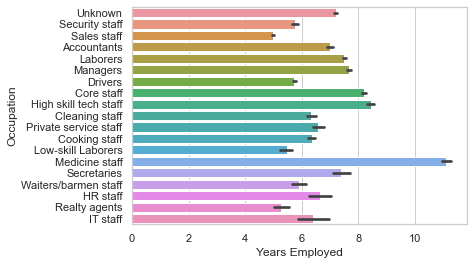

In [92]:
sns.barplot(data=df_clean2, x="Years Employed", y="Occupation")



* This graph shows which employees stick to their jobs for the longest times. Unsurprisingly, we can see that workers in medicine tend to work for longer years, perhaps because of the nature of Medicine and its greater regard for experience. The occupations with the shortest lengths of experience are Sales staff, drivers, and low skill laborers, possibly because many employees in these occupations tend to get promoted into other occupations in relatively short amounts of time

<AxesSubplot:xlabel='Age', ylabel='Education'>

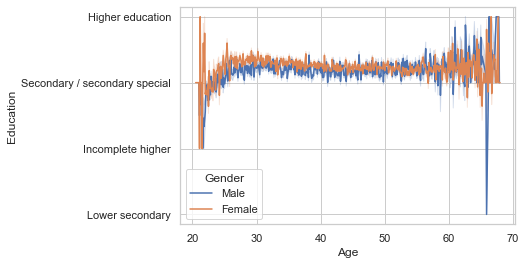

In [100]:
fig = sns.lineplot(data=df_clean2, x="Age", y="Education", hue='Gender').set_t



* This line plot shows that females generally have higher education than males in their 20s-30s then from 30s-70s males and females are practically equal in their education level. This also adds to the absurdity that females are still getting paid less in every profession analysed (from catplot above) even though they generally have a better education.

### Miscellaneous Observations


* It seems that most credit card holders are employed (Which is not surprising since most banks require a steady income in order to get a credit card

* There is also the obvious corelation between income and education level, income increases as the education level increases

* Surprisingly, there is a negative corelation between education level and having a credit card. More people that fall in the below average education level hold a credit card than those in the higher education criteria. Possibly, because people who have a lower education have a lower income and therefore cannot pay for their expenses in cash.

* Older employees get payed the most, as expected. However, surprisingly there isn't an obvious age cutoff where an older employee's income starts to decline. Income seems to keep rising even with very old age, especially in males.